In [1]:
# Import class
import Obtainstockdata_final
from Obtainstockdata_final import *

# Import the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf

In [2]:
#Import the datasets

# Reference: https://senatestockwatcher.com/
senate_df = pd.read_csv("Senate Stocks.csv")
# Reference: https://housestockwatcher.com/
house_df = pd.read_csv("House Stocks.csv")

In [3]:
senate_df.head(5)

,transaction_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,disclosure_date
0,05/23/2022,Spouse,--,"Ryder Systems Inc <div class=""text-muted""><em>...",Corporate Bond,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/1...,06/03/2022
1,05/16/2022,Spouse,--,"Williams Companies <div class=""text-muted""><em...",Corporate Bond,Sale (Full),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/1...,06/03/2022
2,05/16/2022,Spouse,ABYIX,Abbey Capital Futures Strategy Fund- Class I Sha,Other Securities,Purchase,"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/1...,06/03/2022
3,05/16/2022,Spouse,GSMYX,Goldman Sachs Small/Mid-Cap Growth Fund Inst Cl,Other Securities,Sale (Partial),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/1...,06/03/2022
4,05/16/2022,Spouse,--,FIMKX - Fidelity Advisor Focused Emerging Mark...,Other Securities,Sale (Partial),"$1,001 - $15,000",--,Thomas R Carper,https://efdsearch.senate.gov/search/view/ptr/1...,06/03/2022


In [4]:
house_df.head(5)

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
0,2021,10/04/2021,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
1,2021,10/04/2021,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
2,2021,10/04/2021,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
3,2021,10/04/2021,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
4,2021,10/04/2021,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False


### Explore the Data

In [6]:
# Senate df
# All of the data is categorical
# 10 columns

senate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9387 entries, 0 to 9386
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   transaction_date   9387 non-null   object
 1   owner              8922 non-null   object
 2   ticker             8922 non-null   object
 3   asset_description  9387 non-null   object
 4   asset_type         8721 non-null   object
 5   type               8922 non-null   object
 6   amount             9387 non-null   object
 7   comment            8922 non-null   object
 8   senator            9387 non-null   object
 9   ptr_link           9387 non-null   object
 10  disclosure_date    9387 non-null   object
dtypes: object(11)
memory usage: 806.8+ KB


In [7]:
# House df
# Almost all of the data is categorical.  
# One boolean

house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14567 entries, 0 to 14566
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   disclosure_year         14567 non-null  int64 
 1   disclosure_date         14567 non-null  object
 2   transaction_date        14567 non-null  object
 3   owner                   9061 non-null   object
 4   ticker                  14567 non-null  object
 5   asset_description       14563 non-null  object
 6   type                    14567 non-null  object
 7   amount                  14567 non-null  object
 8   representative          14567 non-null  object
 9   district                14567 non-null  object
 10  ptr_link                14567 non-null  object
 11  cap_gains_over_200_usd  14567 non-null  bool  
dtypes: bool(1), int64(1), object(10)
memory usage: 1.2+ MB


In [8]:
# Breakdown of senator trades by buyer
cross_tab_assets_senate = pd.crosstab(senate_df.amount, senate_df.owner)
cross_tab_assets_senate

owner,Child,Joint,Self,Spouse
amount,,,,
"$1,000,001 - $5,000,000",8,3,11,13
"$1,001 - $15,000",154,2778,711,2437
"$100,001 - $250,000",4,108,126,96
"$15,001 - $50,000",12,677,294,678
"$25,000,001 - $50,000,000",0,0,0,2
"$250,001 - $500,000",3,41,32,61
"$5,000,001 - $25,000,000",0,0,6,6
"$50,001 - $100,000",7,123,235,185
"$500,001 - $1,000,000",0,13,13,84


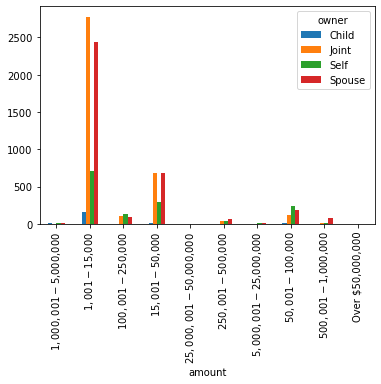

In [9]:
cross_tab_senate_plot = cross_tab_assets_senate.plot.bar()

In [10]:
# Breakdown of senator trades by buyer
cross_tab_assets_house = pd.crosstab(house_df.amount, house_df.owner)
cross_tab_assets_house

owner,--,dependent,joint,self
amount,,,,
"$1,000 - $15,000",0,0,1,0
"$1,000,000 +",0,2,1,26
"$1,000,001 - $5,000,000",0,0,19,15
"$1,001 -",0,0,9,223
"$1,001 - $15,000",1157,286,3250,1771
"$100,001 - $250,000",24,18,171,86
"$15,000 - $50,000",0,0,1,0
"$15,001 - $50,000",87,55,688,490
"$250,001 - $500,000",6,4,91,47


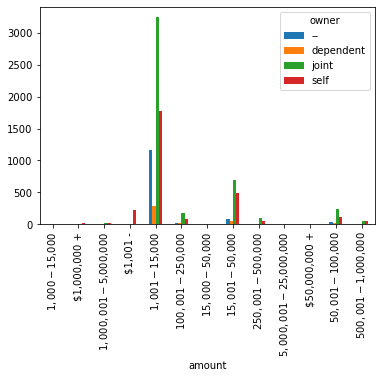

In [11]:
cross_tab_house_plot = cross_tab_assets_house.plot.bar()

### Approach

Combine Senate and House Dataframes

Columns to keep:
- transaction_date 
- disclosure_date
- owner
- ticker
- type
- amount

Columns to make
- senate/house


Stock price 
one week before
two weeks before
three weeks before
four weeks before

one week after
two weeks after
three weeks after
four weeks after


#### Drop Columns

In [12]:
# Senate DataFrame

columns_to_drop = ['asset_description', 'comment', 'ptr_link']
senate_df2 = senate_df.drop(columns = columns_to_drop, axis = 1)

# House DataFrame

columns_to_drop2 = ['disclosure_year', 'asset_description', 'ptr_link', 
                   'cap_gains_over_200_usd']
house_df2 = house_df.drop(columns = columns_to_drop2, axis = 1)


In [13]:
senate_df2.head(2)

,transaction_date,owner,ticker,asset_type,type,amount,senator,disclosure_date
0,05/23/2022,Spouse,--,Corporate Bond,Purchase,"$1,001 - $15,000",Thomas R Carper,06/03/2022
1,05/16/2022,Spouse,--,Corporate Bond,Sale (Full),"$1,001 - $15,000",Thomas R Carper,06/03/2022


In [14]:
house_df2.head(2)

,disclosure_date,transaction_date,owner,ticker,type,amount,representative,district
0,10/04/2021,2021-09-27,joint,BP,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05
1,10/04/2021,2021-09-13,joint,XOM,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05


#### Merge the dataframes

In [15]:
data_frames = [senate_df2, house_df2]

combined_df = pd.concat(data_frames, join = 'outer', axis = 0)

In [16]:
combined_df.head(3)

,transaction_date,owner,ticker,asset_type,type,amount,senator,disclosure_date,representative,district
0,05/23/2022,Spouse,--,Corporate Bond,Purchase,"$1,001 - $15,000",Thomas R Carper,06/03/2022,NaN,NaN
1,05/16/2022,Spouse,--,Corporate Bond,Sale (Full),"$1,001 - $15,000",Thomas R Carper,06/03/2022,NaN,NaN
2,05/16/2022,Spouse,ABYIX,Other Securities,Purchase,"$1,001 - $15,000",Thomas R Carper,06/03/2022,NaN,NaN


In [17]:
combined_df.describe()

,transaction_date,owner,ticker,asset_type,type,amount,senator,disclosure_date,representative,district
count,23954,17983,23489,8721,23489,23954,9387,23954,14567,14567
unique,2761,8,2606,9,9,17,73,1559,179,158
top,2020-03-18,joint,--,Stock,purchase,"$1,001 - $15,000","David A Perdue , Jr",04/27/2020,Hon. Josh Gottheimer,NJ05
freq,292,4524,3018,6752,7596,16342,2597,581,1062,1062


In [18]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23954 entries, 0 to 14566
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_date  23954 non-null  object
 1   owner             17983 non-null  object
 2   ticker            23489 non-null  object
 3   asset_type        8721 non-null   object
 4   type              23489 non-null  object
 5   amount            23954 non-null  object
 6   senator           9387 non-null   object
 7   disclosure_date   23954 non-null  object
 8   representative    14567 non-null  object
 9   district          14567 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


#### Change the date to date object 

In [19]:
combined_df['transaction_date'] = pd.to_datetime(combined_df['transaction_date'], errors = 'coerce')                                                                         

In [20]:
combined_df.head()

,transaction_date,owner,ticker,asset_type,type,amount,senator,disclosure_date,representative,district
0,2022-05-23,Spouse,--,Corporate Bond,Purchase,"$1,001 - $15,000",Thomas R Carper,06/03/2022,NaN,NaN
1,2022-05-16,Spouse,--,Corporate Bond,Sale (Full),"$1,001 - $15,000",Thomas R Carper,06/03/2022,NaN,NaN
2,2022-05-16,Spouse,ABYIX,Other Securities,Purchase,"$1,001 - $15,000",Thomas R Carper,06/03/2022,NaN,NaN
3,2022-05-16,Spouse,GSMYX,Other Securities,Sale (Partial),"$1,001 - $15,000",Thomas R Carper,06/03/2022,NaN,NaN
4,2022-05-16,Spouse,--,Other Securities,Sale (Partial),"$1,001 - $15,000",Thomas R Carper,06/03/2022,NaN,NaN


#### Create a column the classifies whether senator or house representative

In [21]:
conditions = [
    (combined_df['senator'].notnull()),
    (combined_df['representative'].notnull())
]

values = ['Senator', 'Representative']

combined_df['house_affilitation'] = np.select(conditions, values)

combined_df = combined_df.sort_values('transaction_date', ascending = False)


In [22]:
combined_df.head(3)

,transaction_date,owner,ticker,asset_type,type,amount,senator,disclosure_date,representative,district,house_affilitation
6812,2022-12-31,NaN,USD-LGB,NaN,sale_partial,"$100,001 - $250,000",NaN,05/27/2022,Hon. David Madison Cawthorn,NC11,Representative
13982,2022-05-31,NaN,DASH,NaN,purchase,"$15,001 - $50,000",NaN,06/07/2022,Hon. James R. Langevin,RI02,Representative
5001,2022-05-31,joint,HON,NaN,sale_full,"$15,001 - $50,000",NaN,06/03/2022,Hon. Ron Estes,KS04,Representative


Convert the transaction date to datetime

In [23]:
combined_df['transaction_date'] = pd.to_datetime(combined_df['transaction_date'])

See how many unique individuals made transactions

Combine senator and representative columns

In [24]:
#osd = stock_info.OSD

In [25]:
#combined_df = osd.combine_representatives(combined_df)
combined_df = combine_representatives(combined_df)
combined_df.head(5)

,transaction_date,owner,ticker,asset_type,type,amount,disclosure_date,district,house_affilitation,combined_houses
6812,2022-12-31,NaN,USD-LGB,NaN,sale_partial,"$100,001 - $250,000",05/27/2022,NC11,Representative,Hon. David Madison Cawthorn
13982,2022-05-31,NaN,DASH,NaN,purchase,"$15,001 - $50,000",06/07/2022,RI02,Representative,Hon. James R. Langevin
5001,2022-05-31,joint,HON,NaN,sale_full,"$15,001 - $50,000",06/03/2022,KS04,Representative,Hon. Ron Estes
10708,2022-05-27,joint,V,NaN,sale_partial,"$1,001 - $15,000",06/06/2022,NC06,Representative,Hon. Kathy Manning
10705,2022-05-27,joint,CME,NaN,sale_partial,"$1,001 - $15,000",06/06/2022,NC06,Representative,Hon. Kathy Manning


#### Filter for dates prior to March 2022

Use this cell to adjust the number of stock datapoints to obtain.  

In [26]:
combined_df = combined_df.loc[combined_df['transaction_date'] < '2022-03-01']

# Work with only 10 datapoints
combined_df = combined_df.iloc[:8000, :]

In [27]:
combined_df.groupby('house_affilitation')['amount'].count()

house_affilitation
Representative    7036
Senator            964
Name: amount, dtype: int64

In [28]:
#osd = stock_info.OSD

In [29]:
days_add_df = add_days(combined_df)

In [30]:
days_add_df.head(5)

,transaction_date,owner,ticker,asset_type,type,amount,disclosure_date,district,house_affilitation,combined_houses,plus_forty_date
10591,2022-02-28,joint,TGT,NaN,sale_full,"$15,001 - $50,000",03/03/2022,VA08,Representative,Hon. Donald Sternoff Beyer,2022-04-19
10596,2022-02-28,joint,V,NaN,sale_full,"$1,001 - $15,000",03/03/2022,VA08,Representative,Hon. Donald Sternoff Beyer,2022-04-19
10595,2022-02-28,joint,VZ,NaN,sale_full,"$1,001 - $15,000",03/03/2022,VA08,Representative,Hon. Donald Sternoff Beyer,2022-04-19
10590,2022-02-28,joint,ROP,NaN,sale_full,"$15,001 - $50,000",03/03/2022,VA08,Representative,Hon. Donald Sternoff Beyer,2022-04-19
142,2022-02-28,Child,--,Other Securities,Purchase,"$1,000,001 - $5,000,000",03/29/2022,NaN,Senator,"William F Hagerty, Iv",2022-04-19


In [31]:
days_add_df.describe()

C:\Users\kthom\AppData\Local\Temp/ipykernel_29784/3394693770.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  days_add_df.describe()


,transaction_date,owner,ticker,asset_type,type,amount,disclosure_date,district,house_affilitation,combined_houses,plus_forty_date
count,8000,5168,7997,964,7997,8000,8000,7036,8000,8000,8000
unique,366,8,1548,9,9,14,376,129,2,174,366
top,2021-02-16 00:00:00,joint,--,Stock,purchase,"$1,001 - $15,000",03/16/2021,NJ05,Representative,Hon. Josh Gottheimer,2021-04-07 00:00:00
freq,202,2320,783,557,3812,5296,200,530,7036,530,202
first,2020-11-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-24 00:00:00
last,2022-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-19 00:00:00


Remove rows without an asset type or transaction date

In [32]:
days_add_df = days_add_df.dropna(subset=['transaction_date', 'ticker'])

In [33]:
days_add_df = days_add_df[days_add_df.ticker != '--']

In [34]:
days_add_df.head(5)

,transaction_date,owner,ticker,asset_type,type,amount,disclosure_date,district,house_affilitation,combined_houses,plus_forty_date
10591,2022-02-28,joint,TGT,NaN,sale_full,"$15,001 - $50,000",03/03/2022,VA08,Representative,Hon. Donald Sternoff Beyer,2022-04-19
10596,2022-02-28,joint,V,NaN,sale_full,"$1,001 - $15,000",03/03/2022,VA08,Representative,Hon. Donald Sternoff Beyer,2022-04-19
10595,2022-02-28,joint,VZ,NaN,sale_full,"$1,001 - $15,000",03/03/2022,VA08,Representative,Hon. Donald Sternoff Beyer,2022-04-19
10590,2022-02-28,joint,ROP,NaN,sale_full,"$15,001 - $50,000",03/03/2022,VA08,Representative,Hon. Donald Sternoff Beyer,2022-04-19
10594,2022-02-28,joint,UNH,NaN,sale_full,"$15,001 - $50,000",03/03/2022,VA08,Representative,Hon. Donald Sternoff Beyer,2022-04-19


### Dataframes

In [35]:
#osd = stock_info.OSD(days_add_df)

In [36]:
#get_stock_data, no_data = osd.get_transactions()
get_stock_data = main_function(days_add_df)

- BRK.B: No data found, symbol may be delisted
- DISCA: No data found, symbol may be delisted
- VOLVY: No data found for this date range, symbol may be delisted
- PSXP: No data found, symbol may be delisted
- KRR: No data found for this date range, symbol may be delisted
- DUK$A: No data found, symbol may be delisted
- DUK$A: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- PSXP: No data found, symbol may be delisted
- TDDXX: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- AXTE: No data found for this date range, symbol may be delisted
- AXHE: No data found for this date range, symbol may be delisted
- PSXP: No data found, symbol may be delisted
- HTZWW: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- CMCAS: No data found, symbol may be delisted
- CRYX: No data found, symbol may be deli

In [37]:
get_stock_data

,name,owner,transaction,amount_invest,ticker,Date,10_day_change,20_day_change,30_day_change
0,Hon. Donald Sternoff Beyer,joint,sale_full,"$15,001 - $50,000",TGT,2022-02-28,3.604143,9.430846,16.804320
0,Hon. Donald Sternoff Beyer,joint,sale_full,"$1,001 - $15,000",V,2022-02-28,-8.981116,1.068854,0.397930
0,Hon. Donald Sternoff Beyer,joint,sale_full,"$1,001 - $15,000",VZ,2022-02-28,-1.173835,-4.453145,0.953625
0,Hon. Donald Sternoff Beyer,joint,sale_full,"$15,001 - $50,000",ROP,2022-02-28,-3.549606,3.935555,7.712189
0,Hon. Donald Sternoff Beyer,joint,sale_full,"$15,001 - $50,000",UNH,2022-02-28,1.771263,8.127890,15.068326
...,...,...,...,...,...,...,...,...,...
0,William Cassidy,Spouse,Sale (Full),"$1,001 - $15,000",UPS,2020-11-05,3.617762,3.236380,7.333115
0,William Cassidy,Spouse,Sale (Full),"$1,001 - $15,000",WMT,2020-11-05,3.917200,4.063571,2.205367
0,Hon. Michael Garcia,NaN,sale_full,"$15,001 - $50,000",FAS,2020-11-05,24.814723,40.582680,43.496057
0,Hon. Donald Sternoff Beyer,joint,purchase,"$1,001 - $15,000",AAPL,2020-11-04,4.041758,7.257386,11.379304


In [38]:
pd.set_option("display.max_rows", 100)

get_stock_data.groupby(['name', 'ticker', 'Date']).count()

owner  transaction  \
name                       ticker Date                             
A. Mitchell Mcconnell, Jr. WFC    2020-12-03      1            1   
                                  2021-03-03      1            1   
                                  2021-06-03      1            1   
                                  2021-12-03      1            1   
Angus S King, Jr.          ADBE   2021-06-24      1            1   
...                                             ...          ...   
William F Hagerty, Iv      RHP    2021-12-23      2            2   
                           RNR    2021-12-23      1            1   
                                  2021-12-28      1            1   
                           VRM    2021-01-08      1            1   
                                  2021-12-16      1            1   

                                              amount_invest  10_day_change  \
name                       ticker Date                                       
A. Mitchell Mcconnell, Jr. WFC    2020-12-03              1              1   
                                  2021-03-03              1              1   
                                  2021-06-03              1              1   
                                  2021-12-03              1              1   
Angus S King, Jr.          ADBE   2021-06-24              1              1   
...                                                     ...            ...   
William F Hagerty, Iv      RHP    2021-12-23              2              2   
                           RNR    2021-12-23              1              1   
                                  2021-12-28              1              1   
                           VRM    2021-01-08              1              1   
                                  2021-12-16              1              1   

                                              20_day_change  30_day_change  
name                       ticker Date                                      
A. Mitchell Mcconnell, Jr. WFC    2020-12-03              1              1  
                                  2021-03-03              1              1  
                                  2021-06-03              1              1  
                                  2021-12-03              1              1  
Angus S King, Jr.          ADBE   2021-06-24              1              1  
...                                                     ...            ...  
William F Hagerty, Iv      RHP    2021-12-23              2              2  
                           RNR    2021-12-23              1              1  
                                  2021-12-28              1              1  
                           VRM    2021-01-08              1              1  
                                  2021-12-16              1              1  

[5890 rows x 6 columns]

In [39]:
get_stock_data.to_csv('final_df.csv')

In [40]:
get_stock_data.loc[:, 'Date'].describe()

count                    6771
unique                    334
top       2021-02-16 00:00:00
freq                      170
first     2020-11-04 00:00:00
last      2022-02-28 00:00:00
Name: Date, dtype: object